# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 14
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | May 3, flew from Seattle to He..."
1,✅ Trip Verified | I went through three flights...
2,✅ Trip Verified | An excellent flight in Club ...
3,✅ Trip Verified | The flight schedule was dela...
4,✅ Trip Verified | The worst experience in all ...


Congratulations! Now you have your dataset for this task! The loops above collected 1400 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:
df

,reviews
0,"Not Verified | May 3, flew from Seattle to He..."
1,✅ Trip Verified | I went through three flights...
2,✅ Trip Verified | An excellent flight in Club ...
3,✅ Trip Verified | The flight schedule was dela...
4,✅ Trip Verified | The worst experience in all ...
...,...
1395,✅ Verified Review | Bergen to London Heathrow...
1396,✅ Verified Review | Newcastle to Boston via L...
1397,✅ Verified Review | Flew from London Heathrow...
1398,✅ Verified Review | Flew last week London to ...


Removing the parts before | in the reviews column

In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,"May 3, flew from Seattle to Heathrow then to..."
1,I went through three flights to reach my dest...
2,An excellent flight in Club World on British ...
3,The flight schedule was delayed for one hour....
4,The worst experience in all my years of trave...
...,...
1395,Bergen to London Heathrow. I was a Gold exec...
1396,Newcastle to Boston via London. Flight from ...
1397,Flew from London Heathrow to Sofia. I have b...
1398,Flew last week London to Frankfurt. No light...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...
1,I went through three flights to reach my dest...,I went through three flights to reach my dest...
2,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...
3,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...
4,The worst experience in all my years of trave...,The worst experience in all my years of trave...


# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


 
```
NLTK is a leading platform for building Python programs to work with human language data. 

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```




In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...,"[(May, n), (flew, v), (Seattle, n), (Heathrow,..."
1,I went through three flights to reach my dest...,I went through three flights to reach my dest...,"[(went, v), (three, None), (flights, n), (reac..."
2,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...,"[(excellent, a), (flight, n), (Club, n), (Worl..."
3,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...,"[(flight, n), (schedule, n), (delayed, v), (on..."
4,The worst experience in all my years of trave...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...,"[(May, n), (flew, v), (Seattle, n), (Heathrow,...",May fly Seattle Heathrow Edinburgh BA lose g...
1,I went through three flights to reach my dest...,I went through three flights to reach my dest...,"[(went, v), (three, None), (flights, n), (reac...",go three flight reach destination BA flight ...
2,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...,"[(excellent, a), (flight, n), (Club, n), (Worl...",excellent flight Club World British Airways ...
3,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...,"[(flight, n), (schedule, n), (delayed, v), (on...",flight schedule delay one hour board plane d...
4,The worst experience in all my years of trave...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"May 3, flew from Seattle to Heathrow then to...",May fly Seattle Heathrow Edinburgh BA lose g...
1,I went through three flights to reach my dest...,go three flight reach destination BA flight ...
2,An excellent flight in Club World on British ...,excellent flight Club World British Airways ...
3,The flight schedule was delayed for one hour....,flight schedule delay one hour board plane d...
4,The worst experience in all my years of trave...,bad experience year travel first flight two ...
...,...,...
1395,Bergen to London Heathrow. I was a Gold exec...,Bergen London Heathrow Gold executive member...
1396,Newcastle to Boston via London. Flight from ...,Newcastle Boston via London Flight Newcastle...
1397,Flew from London Heathrow to Sofia. I have b...,Flew London Heathrow Sofia fly British Airwa...
1398,Flew last week London to Frankfurt. No light...,Flew last week London Frankfurt light refres...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [12]:
#!pip install vaderSentiment

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...,"[(May, n), (flew, v), (Seattle, n), (Heathrow,...",May fly Seattle Heathrow Edinburgh BA lose g...,-0.7717,Negative
1,I went through three flights to reach my dest...,I went through three flights to reach my dest...,"[(went, v), (three, None), (flights, n), (reac...",go three flight reach destination BA flight ...,-0.4767,Negative
2,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...,"[(excellent, a), (flight, n), (Club, n), (Worl...",excellent flight Club World British Airways ...,0.9899,Positive
3,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...,"[(flight, n), (schedule, n), (delayed, v), (on...",flight schedule delay one hour board plane d...,-0.8402,Negative
4,The worst experience in all my years of trave...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ...,-0.8910,Negative


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    731
Negative    519
Neutral     150
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x7fd1c23d6c80>,
 [Text(-0.07645841865595988, 1.097339560125593, 'Positive'),
  Text(-0.2902605814553288, -1.0610130983419641, 'Negative'),
  Text(1.2742423900603503, -0.445877036158273, 'Neutral')],
 [Text(-0.04170459199415993, 0.5985488509775961, '52.2%'),
  Text(-0.1583239535210884, -0.5787344172774349, '37.1%'),
  Text(0.8023007641120725, -0.28073739313669044, '10.7%')])

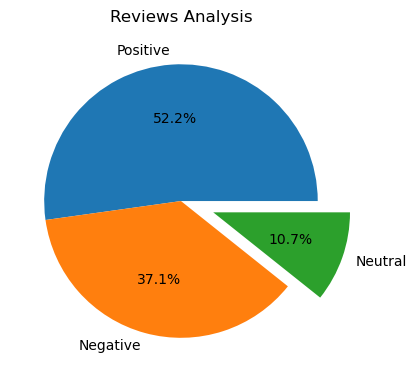

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [16]:
df.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [17]:
#!pip install WordCloud

In [18]:
#!pip install Pillow

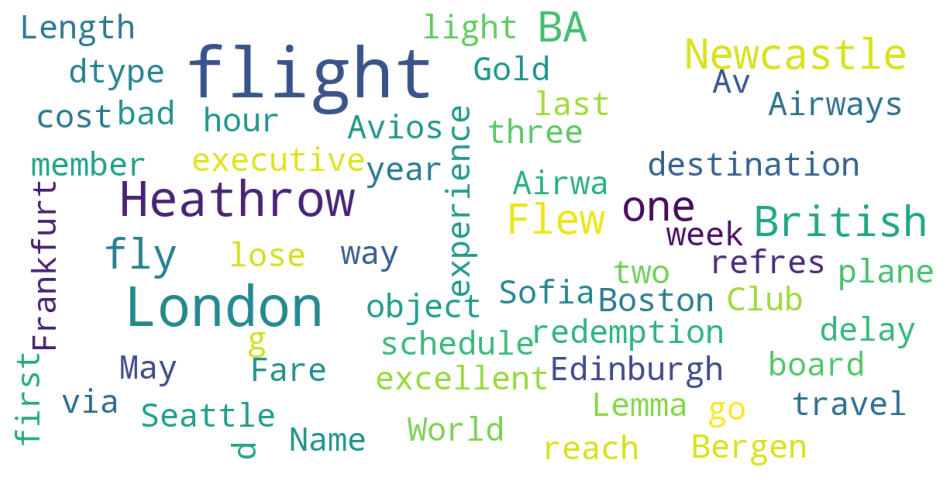

In [19]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)